### Load and Clean the data

In [3]:
# !pip install pandas numpy matplotlib seaborn

In [9]:
# !pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_excel('../data/raw/data.xlsx', engine="openpyxl")   

# Drop empty or unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("Cleaned shape:", df.shape)
print("Columns:", df.columns.tolist())

Cleaned shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


### Number of rows and columns

In [2]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.sample(5)

Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode             float64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                   float64
TransactionStartTime     object
PricingStrategy         float64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
59590,TransactionId_22183,BatchId_4382,AccountId_4841,SubscriptionId_3829,CustomerId_4944,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-150.0,150.0,2019-01-13T19:05:19Z,2.0,0
9085,TransactionId_123085,BatchId_123809,AccountId_4068,SubscriptionId_4164,CustomerId_4518,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000.0,2018-11-27T08:25:04Z,2.0,0
33566,TransactionId_35709,BatchId_110623,AccountId_4841,SubscriptionId_3829,CustomerId_4273,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-496.0,496.0,2018-12-20T08:38:11Z,2.0,0
50123,TransactionId_135276,BatchId_11411,AccountId_2430,SubscriptionId_3946,CustomerId_2845,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,10000.0,10000.0,2019-01-04T03:33:02Z,2.0,0
82765,TransactionId_135664,BatchId_42187,AccountId_1120,SubscriptionId_2520,CustomerId_1477,UGX,256.0,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000.0,5000.0,2019-02-01T20:34:18Z,2.0,0


### Summary Statistics

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95660,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95660.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95660,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution of Numerical Features

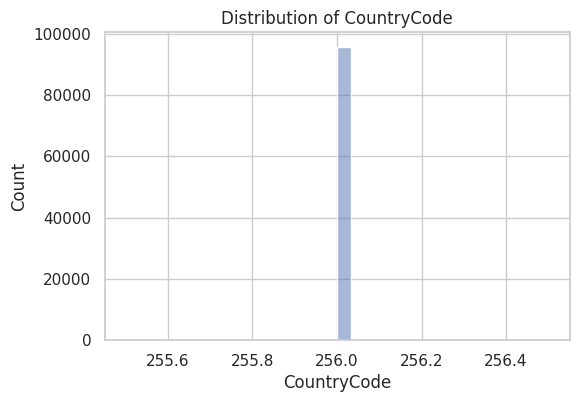

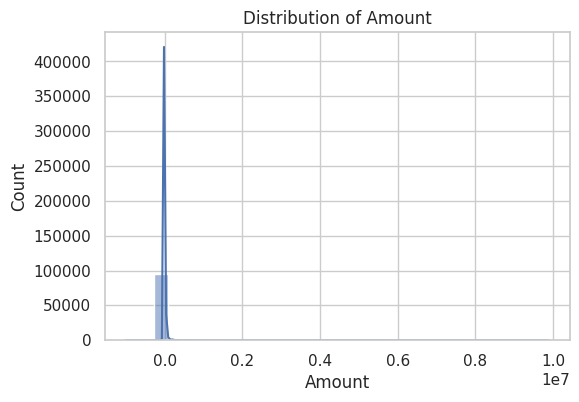

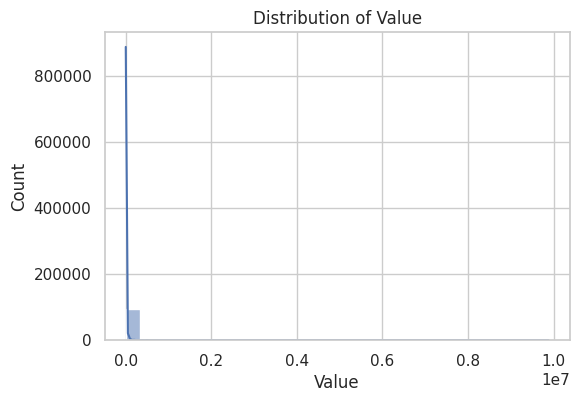

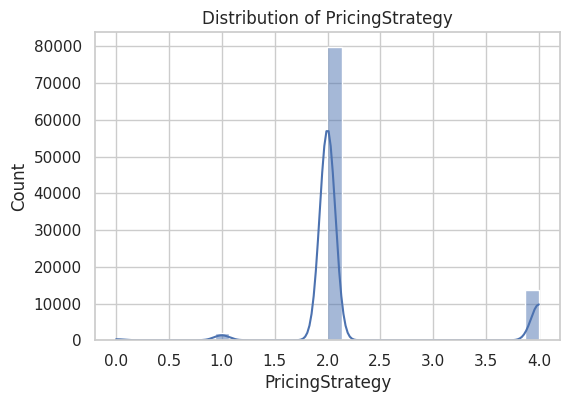

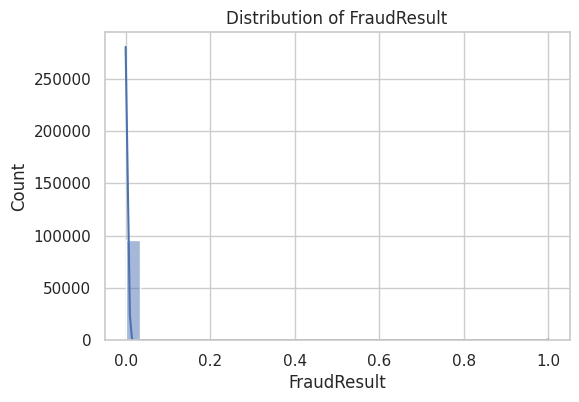

In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Distribution of Categorical Features

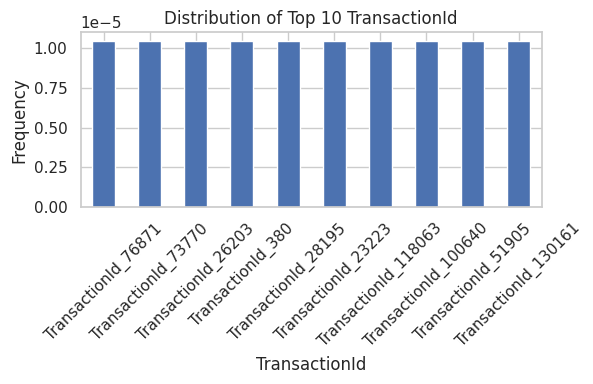

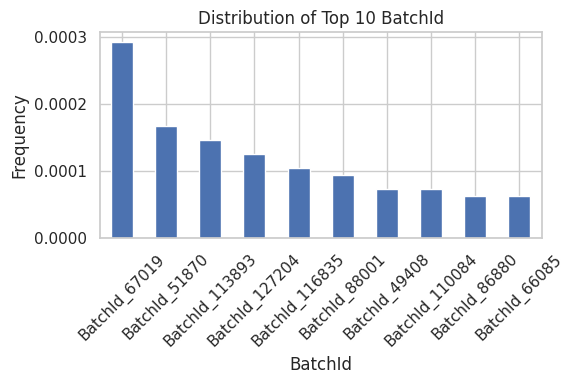

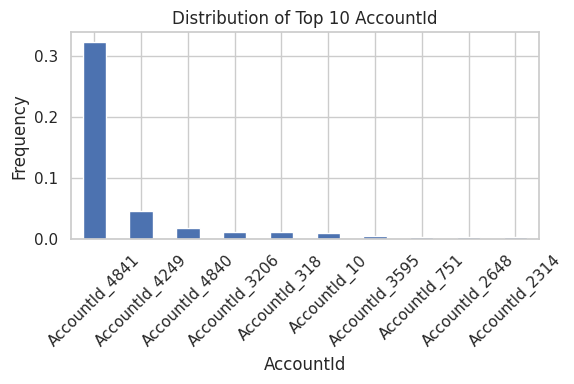

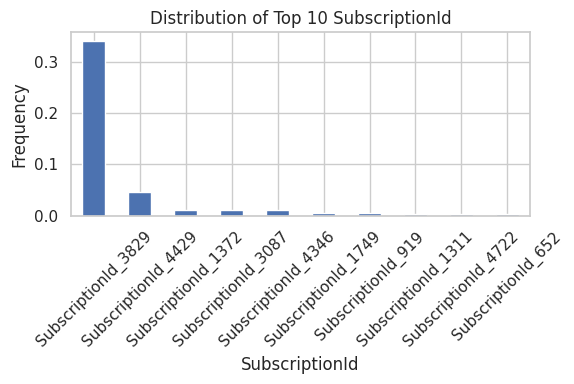

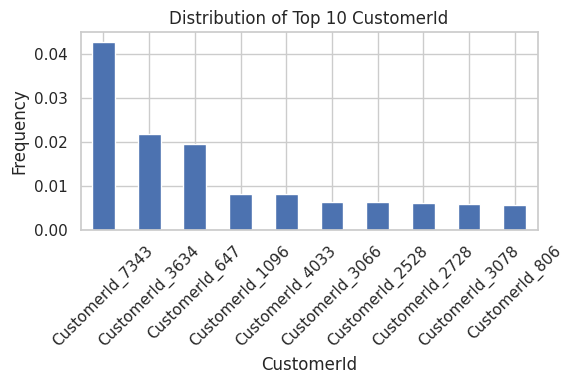

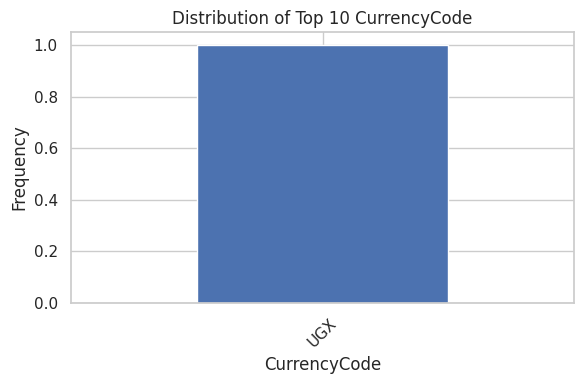

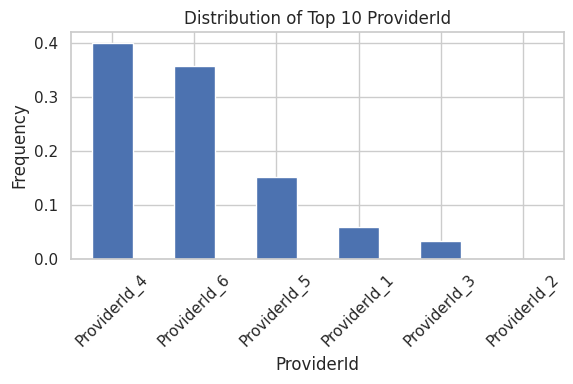

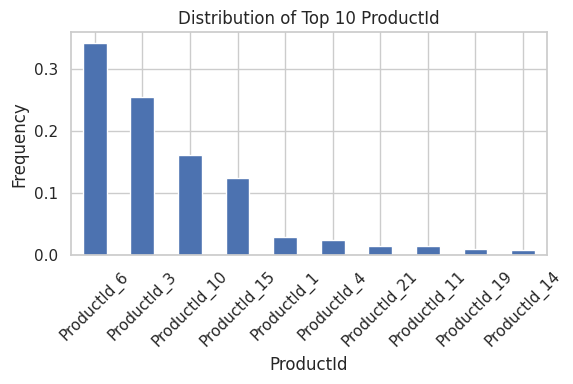

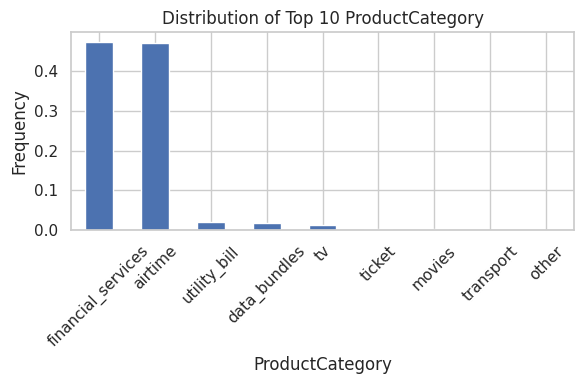

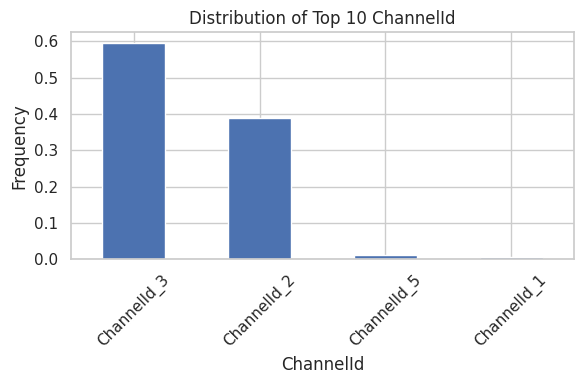

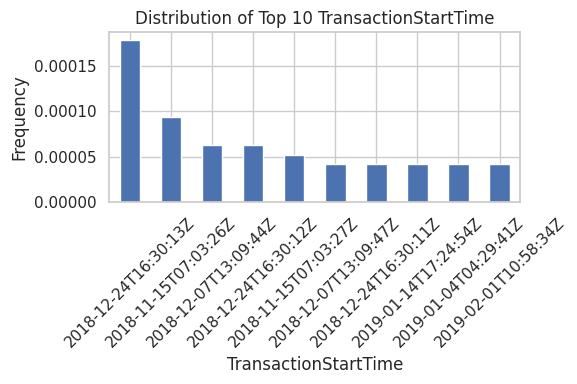

In [5]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f'Distribution of Top 10 {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
for col in categorical_cols:
    print(f"\n {col}")
    print(df[col].value_counts(normalize=True).head(5))


 TransactionId
TransactionId
TransactionId_76871    0.00001
TransactionId_73770    0.00001
TransactionId_26203    0.00001
TransactionId_380      0.00001
TransactionId_28195    0.00001
Name: proportion, dtype: float64

 BatchId
BatchId
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
Name: proportion, dtype: float64

 AccountId
AccountId
AccountId_4841    0.322946
AccountId_4249    0.046592
AccountId_4840    0.018169
AccountId_3206    0.011551
AccountId_318     0.011185
Name: proportion, dtype: float64

 SubscriptionId
SubscriptionId
SubscriptionId_3829    0.341097
SubscriptionId_4429    0.046591
SubscriptionId_1372    0.011551
SubscriptionId_3087    0.011185
SubscriptionId_4346    0.010088
Name: proportion, dtype: float64

 CustomerId
CustomerId
CustomerId_7343    0.042765
CustomerId_3634    0.021795
CustomerId_647     0.019538
CustomerId_1096    0.008196
CustomerId_4033    0.008133
Name: proportion,

### Correlation Analysis

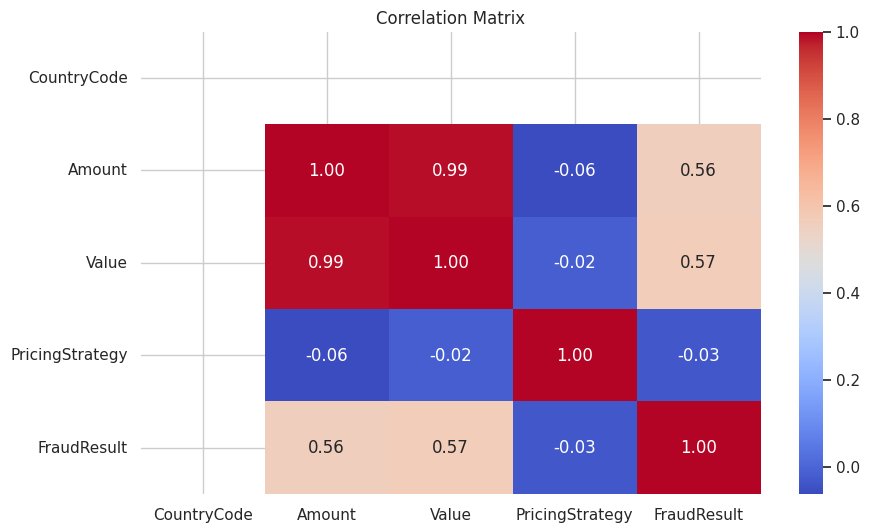

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Missing Values

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percentage = (missing / len(df)) * 100

pd.DataFrame({
    'Missing Values': missing,
    'Percent Missing': missing_percentage
})


,Missing Values,Percent Missing
PricingStrategy,3,0.003136
Value,3,0.003136
CountryCode,2,0.002091
AccountId,2,0.002091
ProviderId,2,0.002091
TransactionStartTime,1,0.001045


### Outlier Detection

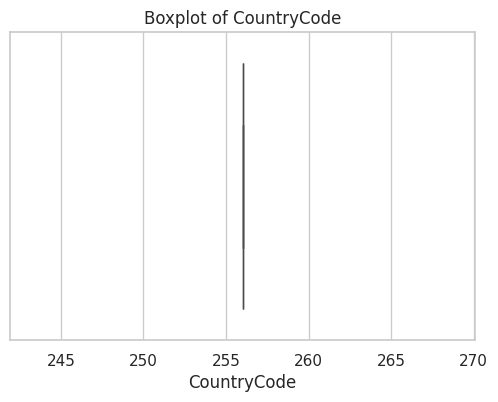

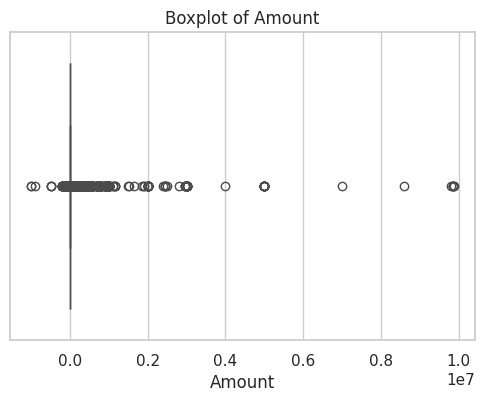

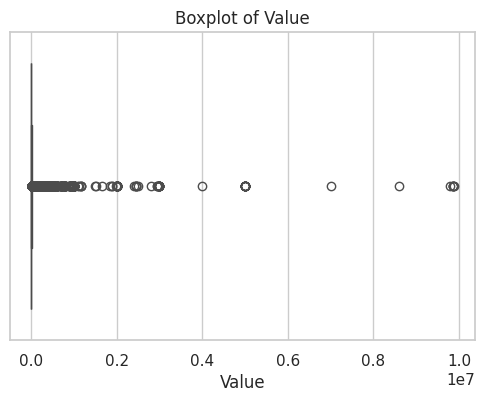

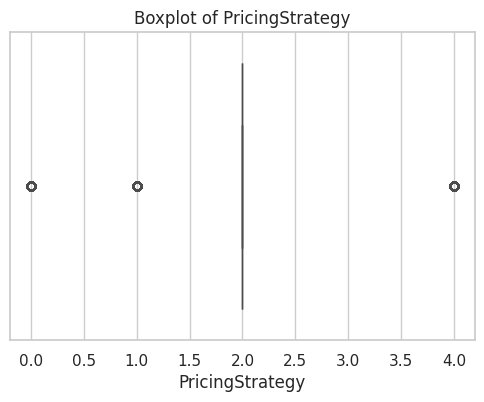

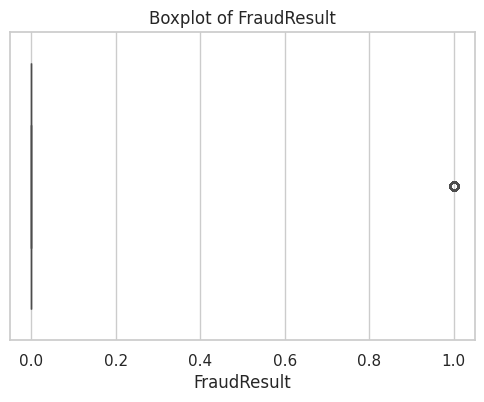

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Insights from Exploratory Data Analysis

1. **Extreme Skewness in Transaction Amounts**  
   The `Amount` and `Value` columns exhibit significant skewness, with transaction values ranging from -1,000,000 to nearly 10 million. These extreme values suggest the presence of large-scale purchases, possible refunds, or anomalies such as fraudulent activity. The high variance may distort model learning and calls for robust transformation techniques like log-scaling or winsorization to reduce their disproportionate influence.

2. **High Concentration of Activity Among Few Users**  
   While the dataset contains over 95,000 transactions, only about 3,600 unique accounts exist, and some users appear tens of thousands of times. This indicates that a small subset of customers dominates the transaction volume. Such an imbalance has major implications for modeling: per-user aggregation (e.g., total spending, frequency of purchase) is necessary to avoid over-representing these accounts in the final model. This finding also supports the use of Recency-Frequency-Monetary (RFM) analysis for customer-level feature engineering.

3. **Strong Redundancy Between Amount and Value Columns**  
   The `Value` column is essentially the absolute version of `Amount`, confirmed by their near-perfect correlation. This redundancy means that one of these columns can be dropped or selectively used depending on the context. For instance, retaining `Amount` preserves directionality (credits vs debits), which may offer additional predictive value in risk modeling.

4. **Behavioral Features Show Clear Dominance Patterns**  
   Categorical variables such as `ChannelId` and `ProductCategory` are heavily dominated by a few categories. For example, a single channel accounts for more than half of all transactions. This kind of skew provides useful behavioral patterns for clustering and modeling customer behavior. These dominant categories may serve as strong predictors of creditworthiness or risk when combined with transaction value or frequency.

5. **Timestamp Feature Needs Transformation for Temporal Analysis**  
   The `TransactionStartTime` feature is in string format and must be converted to a datetime object to be useful. Once parsed, it can be used to derive highly informative temporal features such as hour of day, day of week, or recency relative to a defined snapshot date. These time-based features are critical for RFM segmentation, trend analysis, and the construction of proxy variables for credit risk.